<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<H1>Game of Thrones Classification Model Development.</H1><br>

by: Fernando Patron

Machine Learning
Prof. Chase Kusterer

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong><h2>Introduction:</h2></strong><br>

This study is an analysis that perhaps is something that all Game of Thrones fans wondered several times while watching the series, why do they all die? because my favorite character died? How to guess who is going to die after? .... Well, in this study we will know what is the probability that a character survives and what are the variables for this to happen. Rather, what does it depend on if my favorite character is alive at the end of the story?

DISCLAIMER: For those who are fans of the series and have not finished watching it yet, this review is a SPOILER !!!

<h2><strong>Step 1: Preparation and Exploration</strong></h2>
<br><h3>Imports and Loading the Dataset</h3>

In [1]:
#importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

# loading data
GOT = './Data_set/GOT_character_predictions.xlsx'
GOT = pd.read_excel(io = GOT)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
GOT.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1

In [2]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [3]:
GOT.describe()

S.No    dateOfBirth  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse    isMarried      isNoble            age  numDeadRelations   popularity      isAlive
count  1946.000000     433.000000              1946.000000             1946.000000              1946.000000              1946.000000                 1946.000000      21.000000      26.000000    23.000000     276.000000  1946.000000  1946.000000     433.000000       1946.000000  1946.000000  1946.000000
mean    973.500000    1577.364896                 0.198356                0.374615                 0.480473                 0.591984                    0.395170       0.714286       0.192308     0.652174       0.778986     0.141829     0.460946   -1293.563510          0.305755     0.089584     0.745632
std     561.906131   19565.414460                 0.398864                0.484148                 0.499747                 0.491593                    0.489013       0.462910       0.401918     0.486985       0.415684     0.348965     0.498601   19564.340993          1.383910     0.160568     0.435617
min       1.000000     -28.000000                 0.000000                0.000000                 0.000000                 0.000000                    0.000000       0.000000       0.000000     0.000000       0.000000     0.000000     0.000000 -298001.000000          0.000000     0.000000     0.000000
25%     487.250000     240.000000                 0.000000                0.000000                 0.000000                 0.000000                    0.000000       0.000000       0.000000     0.000000       1.000000     0.000000     0.000000      18.000000          0.000000     0.013378     0.000000
50%     973.500000     268.000000                 0.000000                0.000000                 0.000000                 1.000000                    0.000000       1.000000       0.000000     1.000000       1.000000     0.000000     0.000000      27.000000          0.000000     0.033445     1.000000
75%    1459.750000     285.000000                 0.000000                1.000000                 1.000000                 1.000000                    1.000000       1.000000       0.000000     1.000000       1.000000     0.000000     1.000000      50.000000          0.000000     0.086957     1.000000
max    1946.000000  298299.000000                 1.000000                1.000000                 1.000000                 1.000000                    1.000000       1.000000       1.000000     1.000000       1.000000     1.000000     1.000000     100.000000         15.000000     1.000000     1.000000

<br><h3>Loading the data dictionary</h3><br>
Loading the data dictionary to understand every variable and determine what they really mean.

In [4]:
# pulling up data dictionary
GOT_description = './Data_set/GOT_data_dictionary.xlsx'


# displaying the data dictionary
GOT_description = pd.read_excel (io = GOT_description)

GOT_description.head(25)

S.No                                                            Character number (by order of appearance)
0                         name                                                                                       Character name
1                        title                                                            Honorary title(s) given to each character
2                         male                                                                                 1 = male, 0 = female
3                      culture                                                          Indicates the cultural group of a character
4                  dateOfBirth                                        Known dates of birth for each character (measurement unknown)
5                       mother                                                                        Character's biological mother
6                       father                                                                        Character's biological father
7                         heir                                                                          Character's biological heir
8                        house                               Indicates a character's allegiance to a house (i.e. a powerful family)
9                       spouse                                                                                Character's spouse(s)
10     book1_A_Game_Of_Thrones                                                     1 = appeared in book, 0 = did not appear in book
11      book2_A_Clash_Of_Kings                                                     1 = appeared in book, 0 = did not appear in book
12     book3_A_Storm_Of_Swords                                                     1 = appeared in book, 0 = did not appear in book
13     book4_A_Feast_For_Crows                                                     1 = appeared in book, 0 = did not appear in book
14  book5_A_Dance_with_Dragons                                                     1 = appeared in book, 0 = did not appear in book
15               isAliveMother                                                                             1 = alive, 0 = not alive
16               isAliveFather                                                                             1 = alive, 0 = not alive
17                 isAliveHeir                                                                             1 = alive, 0 = not alive
18               isAliveSpouse                                                                             1 = alive, 0 = not alive
19                   isMarried                                                                         1 = married, 0 = not married
20                     isNoble                                                                             1 = noble, 0 = not noble
21                         age                                                                             Character's age in years
22            numDeadRelations                                       Total number of deceased relatives throughout all of the books
23                  popularity  Indicates the popularity of a character (1 = extremely popular (max), 0 = extremely unpopular (m...
24                     isAlive                                                                             1 = alive, 0 = not alive

In [5]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2><strong>Step 2: Dataset Anomalies</strong></h2>
<br><h3>Detecting missing values</h3>

In [7]:
# checking each feature for missing values
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

<h3>Flagging Missing Values</h3>

In [8]:
# running the mv_flagger function
GOT = mv_flagger(df = GOT)


# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

<h3>Identifying categorical variables</h3>

In [9]:
print("""Categorical:
--------------
'title','culture','mother','father', 'heir', 'house', 'spouse'
""")

Categorical:
--------------
'title','culture','mother','father', 'heir', 'house', 'spouse'



Changing the missing values on the categorical variables to "unknown", and binary variables with the value "0"(zero).

In [10]:
#Filling missing values using "unknown"
GOT['title'] = GOT['title'].fillna('Unknown')
GOT['culture'] = GOT['culture'].fillna('Unknown')
GOT['mother'] = GOT['mother'].fillna('Unknown')
GOT['father'] = GOT['father'].fillna('Unknown')
GOT['heir'] = GOT['heir'].fillna('Unknown')
GOT['house'] = GOT['house'].fillna('Unknown')
GOT['spouse'] = GOT['spouse'].fillna('Unknown')
GOT['isAliveMother'] = GOT['isAliveMother'].fillna(value=0)
GOT['isAliveFather'] = GOT['isAliveFather'].fillna(value=0)
GOT['isAliveHeir'] = GOT['isAliveHeir'].fillna(value=0)
GOT['isAliveSpouse'] = GOT['isAliveSpouse'].fillna(value=0)

# checking results
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                            0
culture                          0
dateOfBirth                   1513
mother                           0
father                           0
heir                             0
house                            0
spouse                           0
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                    0
isAliveFather                    0
isAliveHeir                      0
isAliveSpouse                    0
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother            

The following histogram will show us the Mean, Median and Mode of the variable 'age'.
According to the result of this chart, we will decide for which value we'll substitute the missing values of this particular variable.

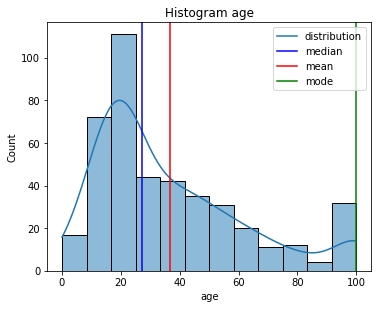

In [11]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# soft coding a list for the labels of the leyend
legend_labels = ['distribution','median','mean','mode']

# developing a histogram for feature meduc
plt.subplot(2, 2, 1)
sns.histplot(data   = GOT[GOT['age']>=0],
             x      = 'age',
             kde    = True)

# placing vertical lines in the plot for the median, mean and mode
plt.axvline(x = GOT['age'].median() , color = 'blue' )
plt.axvline(x = GOT['age'][GOT['age']>=0].mean()   , color = 'red'  )
plt.axvline(x = GOT['age'].mode()[0], color = 'green')

# creating a legend
plt.legend(labels =  legend_labels)

# title and axis labels
plt.title(label   = 'Histogram age')
plt.xlabel(xlabel = 'age')
plt.ylabel(ylabel = "Count")


########################

plt.tight_layout()
plt.show()

In [12]:
# Soft coding MODE for features with missing values
dateOfBirth_mode = GOT['dateOfBirth'].mode()[0]
age_median = GOT['age'].median()


# filling features with missing values with MODE
GOT['dateOfBirth'].fillna(value   = dateOfBirth_mode,
                            inplace = True)
GOT['age'].fillna(value   = age_median,
                            inplace = True)

# checking to make sure missing values are filled in
GOT.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house 

<h3>Gender guessing</h3>

In [13]:
# STEP 1: splitting first name

# placeholder list
placeholder_lst = []

# looping over each complete name
for index, col in GOT.iterrows():
    
    # splitting middlename at 'Space'
    split_name = GOT.loc[index, 'name'].split(sep = " ")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
GOT['first_name'] = pd.DataFrame(placeholder_lst).iloc[:,0]


# displaying the results
GOT['first_name']

0         Viserys
1          Walder
2         Addison
3           Aemma
4           Sylva
          ...    
1941        Luwin
1942         Reek
1943       Symeon
1944    Coldhands
1945        Tytos
Name: first_name, Length: 1946, dtype: object

In [14]:
import gender_guesser.detector as gender # guess gender based on (given) name

# placeholder list
placeholder_lst=[]


# looping to guess gender
for name in GOT['first_name']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)


# converting list into a series
GOT['gender_guess'] = pd.Series(placeholder_lst)


# checking results
GOT.head(n = 10)

unknown
unknown
andy
unknown
female
unknown
unknown
unknown
male
male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
unknown
male
unknown
unknown
male
male
female
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
mostly_female
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
male
male
andy
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
male
male
male
mostly_male
male
mostly_male
mostly_male
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
mostly_male
unknown
unknown
male


unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
female
unknown
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
male
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
female
unknown
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
male
unknown
female
unknown
unknown
unknown
mostly_male
male
unknown
unknown
male
male
male
unknown
female
unknown
unknown
unknown
unknown
female
unknown
female
female
female
male
male
unknown
unknown
unknown
male
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown

S.No                  name                 title   culture  dateOfBirth              mother            father                heir            house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive  m_title  m_culture  m_dateOfBirth  m_mother  m_father  m_heir  m_house  m_spouse  m_isAliveMother  m_isAliveFather  m_isAliveHeir  m_isAliveSpouse  m_age first_name gender_guess
0     1  Viserys II Targaryen               Unknown   Unknown        286.0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen          Unknown              Unknown                        0                       0                        0                        0                           0            1.0            0.0          0.0            0.0          0        0  27.0                11    0.605351        0        1          1              1         0         0       0        1         1                0                0              0                1      1    Viserys      unknown
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0             Unknown           Unknown             Unknown       House Frey          Perra Royce                        1                       1                        1                        1                           1            0.0            0.0          0.0            1.0          1        1  97.0                 1    0.896321        1        0          0              0         1         1       1        0         0                1                1              1                0      0     Walder      unknown
2     3          Addison Hill                   Ser   Unknown        286.0             Unknown           Unknown             Unknown      House Swyft              Unknown                        0                       0                        0                        1                           0            0.0            0.0          0.0            0.0          0        1  27.0                 0    0.267559        1        0          1              1         1         1       1        0         1                1                1              1                1      1    Addison         andy
3     4           Aemma Arryn                 Queen   Unknown         82.0             Unknown           Unknown             Unknown      House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            0.0            0.0          0.0            0.0          1        1  23.0                 0    0.183946        0        0          1              0         1         1       1        0         0                1                1              1                0      0      Aemma      unknown
4     5        Sylva Santagar            Greenstone   Dornish        276.0             Unknown           Unknown             Unknown   House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            0.0            0.0          0.0            1.0          1        1  29.0                 0    0.043478        1        0          0              0         1         1       1        0         0                1                1              1                0      0      Sylva       female
5     6      Tommen Baratheon               Unknown   Unknown        286.0    Cersei Lannister  Robert Baratheon  Myrcella Baratheon          Unknown              Unknown                        0                       0                        0                        0                           0            1.0            1.0          1.0            0.0          0        0  27.0                 5    

In [15]:
GOT['gender_guess'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender_guess, dtype: int64

In [16]:
for val in GOT['gender_guess']:
    print(f"""'{val}'""", end = ', ')

'unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'ma

'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown

In [17]:
#appending the output to the original dataset.
gender_guess_list = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']
GOT['gender_guess'] = pd.Series(gender_guess_list)

#Visualizing the output.
GOT[['name','first_name','gender_guess']].head(n = 5)

name first_name gender_guess
0  Viserys II Targaryen    Viserys      unknown
1           Walder Frey     Walder      unknown
2          Addison Hill    Addison         andy
3           Aemma Arryn      Aemma      unknown
4        Sylva Santagar      Sylva       female

In [18]:
# one hot encoding variables
one_hot_gender_guess = pd.get_dummies(GOT['gender_guess'])



# joining codings together
GOT = GOT.join(other = [one_hot_gender_guess])

GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'first_name', 'gender_guess', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown'], dtype='object')

<h3>Changing variables to boolean</h3>

In [19]:
#creating a boolean for is_male,
#we will still use the other column as well 
GOT['is_male'] = GOT['male'] + GOT['mostly_male'] + GOT['andy']

GOT['is_male'].value_counts()

0    1531
1     415
Name: is_male, dtype: int64

In [20]:
#creating a boolean for is_TSer
#we will still use the other column as well 
GOT['is_TSer'] = 0

for index, value in GOT.iterrows():

    if GOT.loc[ index ,'title'] =="Ser":
        GOT.loc[ index ,'is_TSer'] = 1

In [21]:
#creating a boolean for is_culture
#we will still use the other column as well 
GOT['is_culture_unknown'] = 0

for index, value in GOT.iterrows():

    if GOT.loc[ index ,'culture'] =="Unknown":
        GOT.loc[ index ,'is_culture_unknown'] = 1
        
GOT['is_culture_unknown'].value_counts()

1    1269
0     677
Name: is_culture_unknown, dtype: int64

In [22]:
#creating a boolean for dead_relations
#we will still use the other column as well 
GOT['not_dead_relations'] = 0

for index, value in GOT.iterrows():

    if GOT.loc[ index ,'numDeadRelations'] > 0:
        GOT.loc[ index ,'not_dead_relations'] = 1
        
GOT['not_dead_relations'].value_counts()

0    1801
1     145
Name: not_dead_relations, dtype: int64

In [23]:
#Create new feature using a np where() function

GOT['powerfull_house'] = np.where((GOT['house'] == 'House Tully') | 
                                  (GOT['house'] == 'House Arryn')| 
                                  (GOT['house'] == 'House Martell')| 
                                  (GOT['house'] == 'House Baratheon')| 
                                  (GOT['house'] == 'House Tyrell') | 
                                  (GOT['house'] == 'House Greyjoy') | 
                                  (GOT['house'] == 'House Lannister') | 
                                  (GOT['house'] == 'House Targaryen') | 
                                  (GOT['house'] == 'House Stark') | 
                                  (GOT['house'] == 'House Umber') | 
                                  (GOT['house'] == 'House Mormont') |  
                                  (GOT['house'] == 'House Karstark') | 
                                  (GOT['house'] == 'House Baratheon of Dragonstone'),1,0)



#check if funtion works
GOT['powerfull_house'].value_counts()

0    1585
1     361
Name: powerfull_house, dtype: int64

In [24]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {GOT.shape[0]}
Features:     {GOT.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     51



In [25]:
for val in GOT:
    print(f" '{val}', ")

 'S.No', 
 'name', 
 'title', 
 'culture', 
 'dateOfBirth', 
 'mother', 
 'father', 
 'heir', 
 'house', 
 'spouse', 
 'book1_A_Game_Of_Thrones', 
 'book2_A_Clash_Of_Kings', 
 'book3_A_Storm_Of_Swords', 
 'book4_A_Feast_For_Crows', 
 'book5_A_Dance_with_Dragons', 
 'isAliveMother', 
 'isAliveFather', 
 'isAliveHeir', 
 'isAliveSpouse', 
 'isMarried', 
 'isNoble', 
 'age', 
 'numDeadRelations', 
 'popularity', 
 'isAlive', 
 'm_title', 
 'm_culture', 
 'm_dateOfBirth', 
 'm_mother', 
 'm_father', 
 'm_heir', 
 'm_house', 
 'm_spouse', 
 'm_isAliveMother', 
 'm_isAliveFather', 
 'm_isAliveHeir', 
 'm_isAliveSpouse', 
 'm_age', 
 'first_name', 
 'gender_guess', 
 'andy', 
 'female', 
 'male', 
 'mostly_female', 
 'mostly_male', 
 'unknown', 
 'is_male', 
 'is_TSer', 
 'is_culture_unknown', 
 'not_dead_relations', 
 'powerfull_house', 


In [26]:
#dropping features
GOT_data = GOT.drop(['S.No' , 
                             'name' , 
                             'title' , 
                             'culture' , 
                             'dateOfBirth' , 
                             'mother' , 
                             'father' , 
                             'heir' , 
                             'house' , 
                             'spouse' , 
                             'isAliveMother' , 
                             'isAliveFather' , 
                             'isAliveHeir' , 
                             'isAliveSpouse' , 
                             #'isAlive' , 
                             'first_name' , 
                             'gender_guess' , 
                             'andy' , 
                             'female' , 
                             'male' , 
                             'mostly_female' , 
                             'mostly_male' , 
                             'unknown' ],
                              axis = 1)

GOT_target = GOT.loc[ : , 'isAlive']

GOT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   book1_A_Game_Of_Thrones     1946 non-null   int64  
 1   book2_A_Clash_Of_Kings      1946 non-null   int64  
 2   book3_A_Storm_Of_Swords     1946 non-null   int64  
 3   book4_A_Feast_For_Crows     1946 non-null   int64  
 4   book5_A_Dance_with_Dragons  1946 non-null   int64  
 5   isMarried                   1946 non-null   int64  
 6   isNoble                     1946 non-null   int64  
 7   age                         1946 non-null   float64
 8   numDeadRelations            1946 non-null   int64  
 9   popularity                  1946 non-null   float64
 10  isAlive                     1946 non-null   int64  
 11  m_title                     1946 non-null   int64  
 12  m_culture                   1946 non-null   int64  
 13  m_dateOfBirth               1946 

In [27]:
df_corr = GOT.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_mother                      0.14
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
female                        0.05
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_house                       0.04
m_culture                     0.04
m_title                       0.04
is_culture_unknown            0.04
book5_A_Dance_with_Dragons    0.03
mostly_male                   0.01
andy                          0.01
book3_A_Storm_Of_Swords       0.01
mostly_female                 0.00
is_male                      -0.00
isAliveSpouse                -0.01
male                         -0.01
is_TSer                      -0.02
unknown                      -0.03
isNoble             

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2><strong>Step 3: Logistic Regression</strong></h2>
<br>Now that we've finished developing features (although we could have developed many, many more), we are ready to start the model building process. As a first step, let's see how the explanatory variables correlate with the response variable.

<strong>Correlation Analysis</strong><br>

This will show the correlations between the response variable and the explanatory variables (rounded to two decimal places).

In [28]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [29]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h3>Preparing Explanatory and Response Data</h3>
Declare the explanatory variables and the response variable (isAlive)

In [30]:
# declaring explanatory variables
GOT_x_variables = GOT.drop( [ 'S.No','name' , 
                             'title' , 
                             'culture' , 
                             'dateOfBirth' , 
                             'mother' , 
                             'father' , 
                             'heir' , 
                             'house' , 
                             'spouse' , 
                             'isAliveMother' , 
                             'isAliveFather' , 
                             'isAliveHeir' , 
                             'isAliveSpouse' , 
                             'isAlive' , 
                             'first_name' , 
                             'gender_guess' , 
                             'andy' , 
                             'female' , 
                             'male' , 
                             'mostly_female' , 
                             'mostly_male' , 
                             'unknown' ], axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

<br>
<strong>Stratifying the Response Variable</strong><br>
This next code is for preserving the balance of the response variable. For this dataset of GOT (Game of Thrones) we need to preserve the proportion of characters who end up alive at the end of the 5th book. This can be accomplished by using the <em>stratify</em> argument of <strong>train_test_split(&nbsp;)</strong>. 
The code below will output the original balance between those that are alive and those who died by the end of the 5th book.

<h3>Train-test split for statsmodels.</h3>

In [31]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_x_variables,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [32]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<h3>Build a Univariate Logistic Regression Model</h3><br>
Build a logistic regression model in <strong>statsmodels</strong> using the explanatory variable that is most highly correlated with the response variable, in this case "book4_A_Feast_For_Crows"

In [33]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows""",
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 11:25  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

<h3>Build a logistic regression model in statsmodels using all of the explanatory variables.</h3>

The following code is for printing all the variables so it makes it easier to copy/paste.<br>

In [34]:
for val in GOT_x_variables:
    print(f" {val} + ")

 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 is_male + 
 is_TSer + 
 is_culture_unknown + 
 not_dead_relations + 
 powerfull_house + 


In [35]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive ~  book1_A_Game_Of_Thrones + 
                                                     book2_A_Clash_Of_Kings + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     book5_A_Dance_with_Dragons + 
                                                     isMarried + 
                                                     age + 
                                                     numDeadRelations + 
                                                     popularity + 
                                                     m_title + 
                                                     m_culture + 
                                                     m_dateOfBirth + 
                                                     m_mother + 
                                                     m_father + 
                                                     m_heir + 
                                                     m_house + 
                                                     m_spouse + 
                                                     m_isAliveMother + 
                                                     m_isAliveFather + 
                                                     m_isAliveHeir + 
                                                     m_isAliveSpouse + 
                                                     m_age + 
                                                     is_male + 
                                                     is_TSer + 
                                                     is_culture_unknown + 
                                                     not_dead_relations + 
                                                     powerfull_house""",
                                                    data    = GOT_train)


# fitting the model object
results_full = logit_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.489641
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
===============================================================================================
Model:                        Logit                      Pseudo R-squared:           0.136     
Dependent Variable:           isAlive                    AIC:                        1756.7212 
Date:                         2021-12-05 11:26           BIC:                        1871.5480 
No. Observations:             1751                       Log-Likelihood:             -857.36   
Df Model:                     20                         LL-Null:                    -992.53   
Df Residuals:                 1730                       LLR p-value:                8.7672e-46
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               10.0000                                                          
-----------------------------------------------------------------------------------------------
                            Coef.     Std.Err.       z    P>|z|       [0.025         0.975]    
-----------------------------------------------------------------------------------------------
Intercept                  -1.5426            nan     nan    nan             nan            nan
book1_A_Game_Of_Thrones    -0.5264         0.1606 -3.2779 0.0010         -0.8412        -0.2117
book2_A_Clash_Of_Kings     -0.2729         0.1435 -1.9018 0.0572         -0.5542         0.0084
book3_A_Storm_Of_Swords    -0.2875         0.1495 -1.9227 0.0545         -0.5806         0.0056
book4_A_Feast_For_Crows     1.7064         0.1549 11.0137 0.0000          1.4028         2.0101
book5_A_Dance_with_Dragons -0.0040         0.1472 -0.0274 0.9781         -0.2925         0.2845
isMarried                  -1.0731            nan     nan    nan             nan            nan
age                         0.0000         0.0001  0.3513 0.7253         -0.0001         0.0001
numDeadRelations           -0.0323         0.0634 -0.5087 0.6109         -0.1566         0.0921
popularity                 -0.2802         0.5011 -0.5592 0.5760         -1.2623         0.7019
m_title                     0.0745         0.1483  0.5020 0.6157         -0.2163         0.3652
m_culture                   0.0610            nan     nan    nan             nan            nan
m_dateOfBirth               0.3985   6415002.1394  0.0000 1.0000  -12573172.7555  12573173.5525
m_mother                    0.8014  11198945.8618  0.0000 1.0000  -21949529.7526  21949531.3553
m_father                    0.1227            nan     nan    nan             nan            nan
m_heir                      0.3087   6313904.0909  0.0000 1.0000  -12375024.3113  12375024.9287
m_house                     0.3479         0.1706  2.0396 0.0414          0.0136         0.6822
m_spouse                   -0.4695 105045382.5699 -0.0000 1.0000 -205885167.0487 205885166.1098
m_isAliveMother             0.8014  11198945.8618  0.0000 1.0000  -21949529.7526  21949531.3553
m_isAliveFather             0.1227            nan     nan    nan             nan            nan
m_isAliveHeir               0.3087  23919208.8713  0.0000 1.0000  -46880787.6178  46880788.2352
m_isAliveSpouse            -0.4695            nan     nan    nan             nan            nan
m_age                       0.3985   6415002.1394  0.0000 1.0000  -12573172.7555  12573173.5525
is_male                    -0.1456         0.1518 -0.9588 0.3376         -0.4431         0.1520
is_TSer                    -0.2112         0.1828 -1.1558 0.2478         -0.5694         0.1470
is_culture_unknown          0.0610            nan     nan    nan             nan            nan
not_dead_relations         -0.3888         0.3449 -1.1275 0.2595         -1.0647         0.2871
powerfull_house            -0.0168         0.1692 -0.0995 0.9207         -0.3485         0.3149
========================================================

In [36]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~  book1_A_Game_Of_Thrones + 
                                                     book2_A_Clash_Of_Kings + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     numDeadRelations + 
                                                     popularity + 
                                                     m_title + 
                                                     m_house + 
                                                     is_male + 
                                                     is_TSer + 
                                                     not_dead_relations 
                                                   """,
                                                    data    = GOT_train)


# fitting the model object
results_sig = logit_sig.fit()


# checking the results SUMMARY
results_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.499663
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.119     
Dependent Variable:   isAlive            AIC:                1773.8197 
Date:                 2021-12-05 11:26   BIC:                1839.4350 
No. Observations:     1751               Log-Likelihood:     -874.91   
Df Model:             11                 LL-Null:            -992.53   
Df Residuals:         1739               LLR p-value:        3.4013e-44
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7599   0.1474  5.1546 0.0000  0.4709  1.0488
book1_A_Game_Of_Thrones -0.4286   0.1556 -2.7542 0.0059 -0.7336 -0.1236
book2_A_Clash_Of_Kings  -0.3054   0.1398 -2.1843 0.0289 -0.5795 -0.0314
book3_A_Storm_Of_Swords -0.2384   0.1429 -1.6689 0.0951 -0.5184  0.0416
book4_A_Feast_For_Crows  1.6309   0.1413 11.5400 0.0000  1.3539  1.9078
numDeadRelations        -0.0650   0.0641 -1.0126 0.3113 -0.1907  0.0608
popularity              -1.3386   0.4504 -2.9720 0.0030 -2.2213 -0.4558
m_title                 -0.0044   0.1425 -0.0309 0.9754 -0.2837  0.2749
m_house                  0.3613   0.1551  2.3303 0.0198  0.0574  0.6653
is_male                 -0.0790   0.1499 -0.5269 0.5983 -0.3728  0.2148
is_TSer                 -0.1699   0.1765 -0.9631 0.3355 -0.5158  0.1759
not_dead_relations      -0.6377   0.3362 -1.8967 0.0579 -1.2967  0.0213
=======================================================================

"""

In [37]:
# instantiating a logistic regression model object
logit_sig_2 = smf.logit(formula = """ isAlive ~  book1_A_Game_Of_Thrones +                          
                                                     book4_A_Feast_For_Crows +
                                                     popularity + 
                                                     m_title + 
                                                     m_house + 
                                                     not_dead_relations 
                                                   """,
                                                    data    = GOT_train)


# fitting the model object
results_sig2 = logit_sig_2.fit()


# checking the results SUMMARY
results_sig2.summary2()

Optimization terminated successfully.
         Current function value: 0.503043
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.113     
Dependent Variable:   isAlive            AIC:                1775.6552 
Date:                 2021-12-05 11:26   BIC:                1813.9308 
No. Observations:     1751               Log-Likelihood:     -880.83   
Df Model:             6                  LL-Null:            -992.53   
Df Residuals:         1744               LLR p-value:        1.9473e-45
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.5528   0.1134  4.8746 0.0000  0.3305  0.7751
book1_A_Game_Of_Thrones -0.5560   0.1482 -3.7514 0.0002 -0.8466 -0.2655
book4_A_Feast_For_Crows  1.4811   0.1254 11.8097 0.0000  1.2353  1.7269
popularity              -1.6095   0.4256 -3.7812 0.0002 -2.4437 -0.7752
m_title                  0.0491   0.1215  0.4038 0.6864 -0.1891  0.2873
m_house                  0.4273   0.1518  2.8146 0.0049  0.1297  0.7248
not_dead_relations      -0.8242   0.2488 -3.3132 0.0009 -1.3117 -0.3366
=======================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2><strong>Step 4: Logistic Regression in scikit-learn</strong></h2><br>
We can use the modeling efforts above as candidate models. In an effort to stay organized, we can put each candidate model into a dictionary. Run the code below to produce a dictionary of each candidate model's explanatory variables.

In [38]:
for val in GOT_x_variables:
    print(f" '{val}', ")

 'book1_A_Game_Of_Thrones', 
 'book2_A_Clash_Of_Kings', 
 'book3_A_Storm_Of_Swords', 
 'book4_A_Feast_For_Crows', 
 'book5_A_Dance_with_Dragons', 
 'isMarried', 
 'isNoble', 
 'age', 
 'numDeadRelations', 
 'popularity', 
 'm_title', 
 'm_culture', 
 'm_dateOfBirth', 
 'm_mother', 
 'm_father', 
 'm_heir', 
 'm_house', 
 'm_spouse', 
 'm_isAliveMother', 
 'm_isAliveFather', 
 'm_isAliveHeir', 
 'm_isAliveSpouse', 
 'm_age', 
 'is_male', 
 'is_TSer', 
 'is_culture_unknown', 
 'not_dead_relations', 
 'powerfull_house', 


In [39]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : [  'S.No','book1_A_Game_Of_Thrones', 
                     'book2_A_Clash_Of_Kings', 
                     'book3_A_Storm_Of_Swords', 
                     'book4_A_Feast_For_Crows', 
                     'book5_A_Dance_with_Dragons', 
                     'isMarried', 
                     'isNoble', 
                     'age', 
                     'numDeadRelations', 
                     'popularity', 
                     'm_title', 
                     'm_culture', 
                     'm_dateOfBirth', 
                     'm_mother', 
                     'm_father', 
                     'm_heir', 
                     'm_house', 
                     'm_spouse', 
                     'm_isAliveMother', 
                     'm_isAliveFather', 
                     'm_isAliveHeir', 
                     'm_isAliveSpouse', 
                     'm_age', 
                     'is_male', 
                     'powerfull_house', 
                     'is_TSer', 
                     'is_culture_unknown', 
                     'not_dead_relations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['S.No','book1_A_Game_Of_Thrones', 
                     'book2_A_Clash_Of_Kings', 
                     'book3_A_Storm_Of_Swords', 
                     'book4_A_Feast_For_Crows', 
                     'm_house',
                     'is_male', 
                     'is_TSer', 
                     'not_dead_relations'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['S.No','book1_A_Game_Of_Thrones', 
                    'book4_A_Feast_For_Crows', 
                    'popularity',
                    'm_house',
                    'not_dead_relations']

}

<h3>Dynamically print each explanatory variable set.</h3><br>

In [40]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'is_male', 'powerfull_house', 'is_TSer', 'is_culture_unknown', 'not_dead_relations']


First Significant p-value Model:
--------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'm_house', 'is_male', 'is_TSer', 'not_dead_relations']


Second Significant p-value Model:
---------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'not_dead_rel

<h3>Build a logistic regression model in scikit-learn</h3>
Build a logistic regression model in scikit-learn using the <strong>logistic_sig</strong> explanatory variables and <strong>isAlive</strong> as the response variable.

In [41]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7647
LogReg Testing  ACCURACY: 0.8564
LogReg Train-Test Gap   : 0.0917


<br><br>
<h3>The Confusion Matrix</h3><br>

In [42]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 27  23]
 [  5 140]]


In [43]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 5
True Positives : 140



<strong>Visualized Confusion Matrix</strong><br>

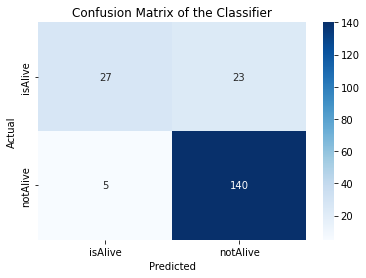

In [44]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'notAlive'])

In [45]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7528


<strong>Model coefficients.</strong>

In [46]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 1.24)
('S.No', -0.0)
('book1_A_Game_Of_Thrones', -0.41)
('book4_A_Feast_For_Crows', -0.24)
('popularity', -0.17)
('m_house', 1.76)
('not_dead_relations', 0.17)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2><strong>Step 5: Classification Trees (CART Models)</strong></h2><br>

Loading a user-defined function for CART model output.

In [47]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Developing a classification tree model.

In [48]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.7026
Full Tree AUC Score: 0.6428


In [49]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 34
True Positives : 111



Generating a visual full tree output.

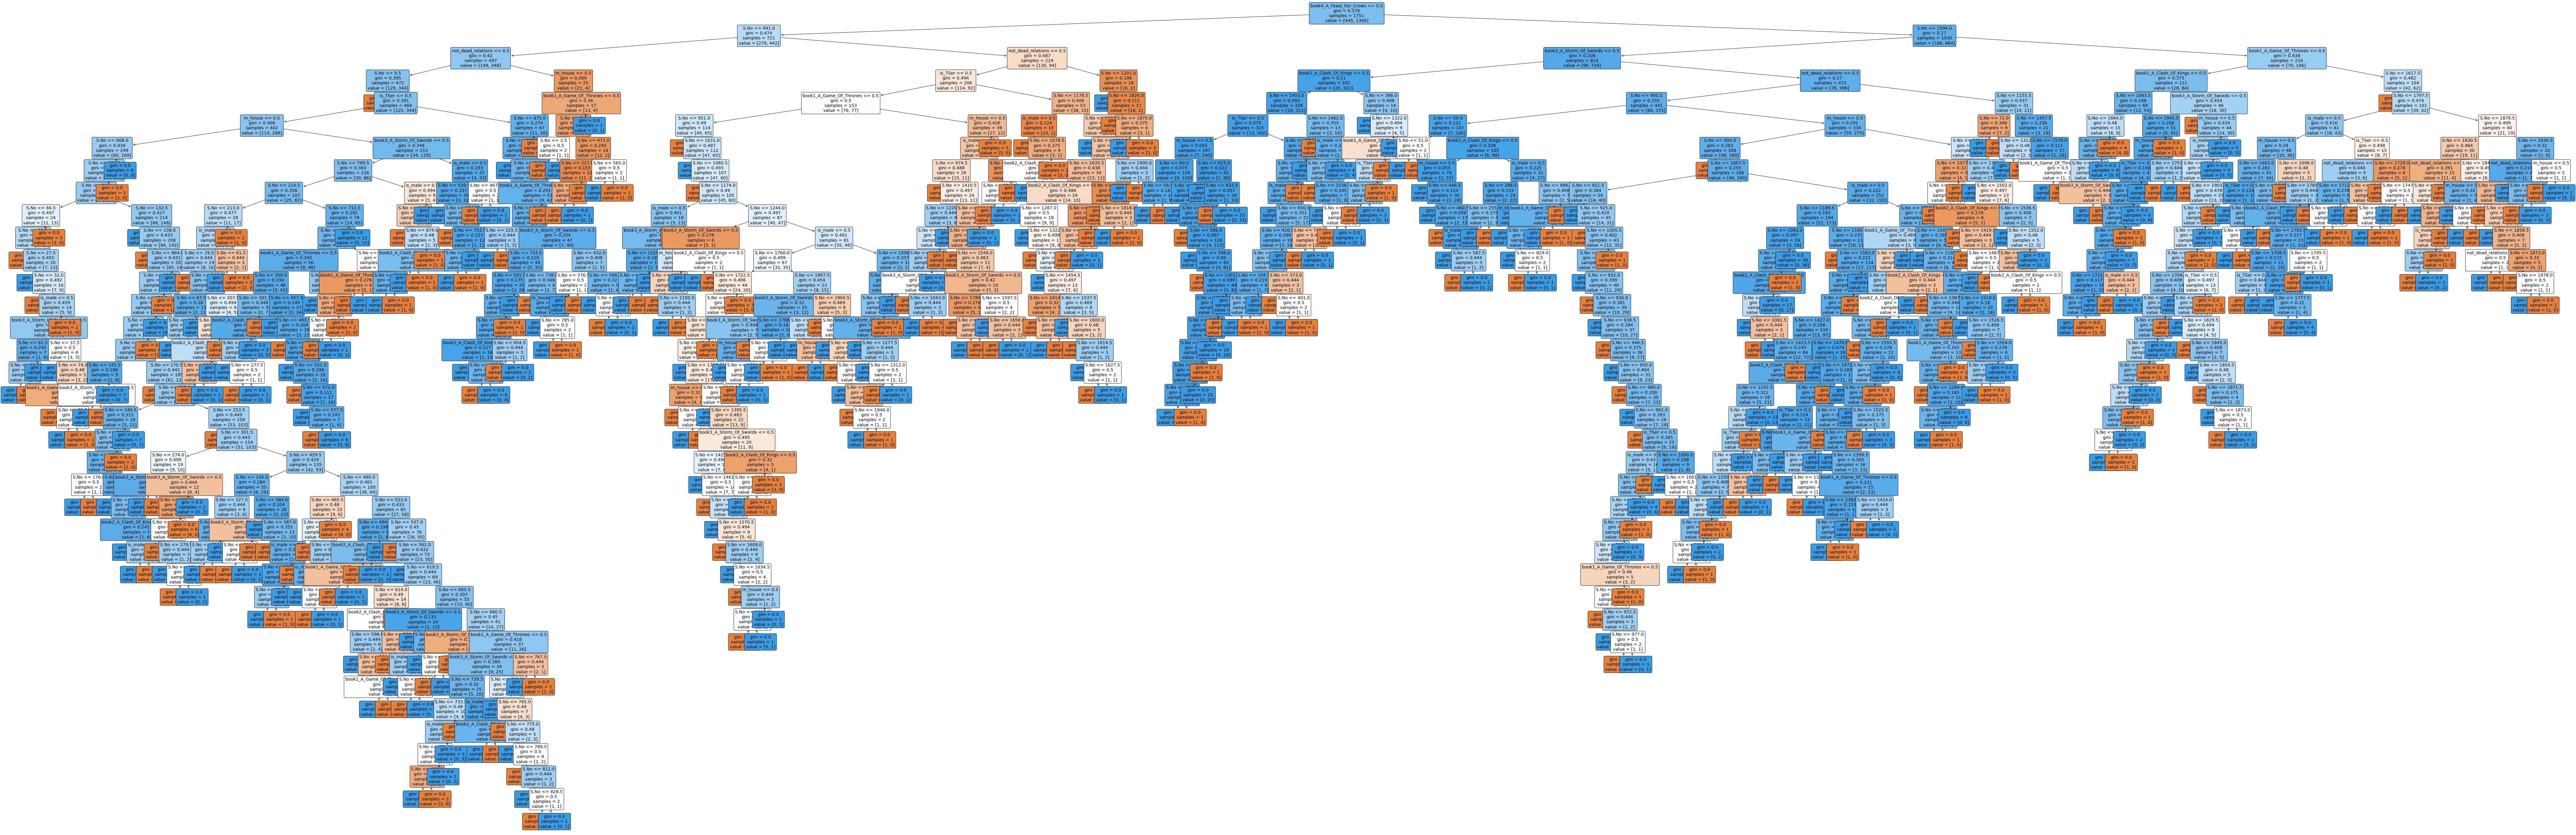

In [50]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT_data.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<h3>Development of a new classificaion tree model.</h3><br>
Developing a classification tree with a maximum depth of 4 and a minimum number of samples per leaf of 25.

In [51]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7807
Testing  ACCURACY: 0.8154
AUC Score        : 0.6859


<strong>Unpacking the confusion matrix</strong>

In [52]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 7
True Positives : 138



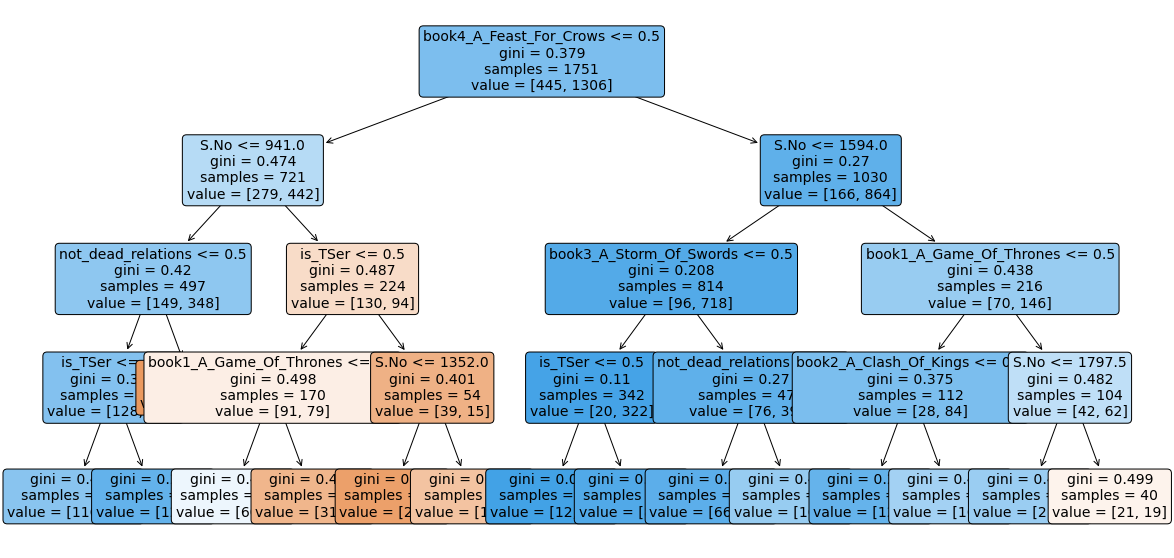

In [53]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT_data.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<strong>Feature Importance</strong><br>

This will let us know how "important" each feature is in terms of splitting the data into nodes.

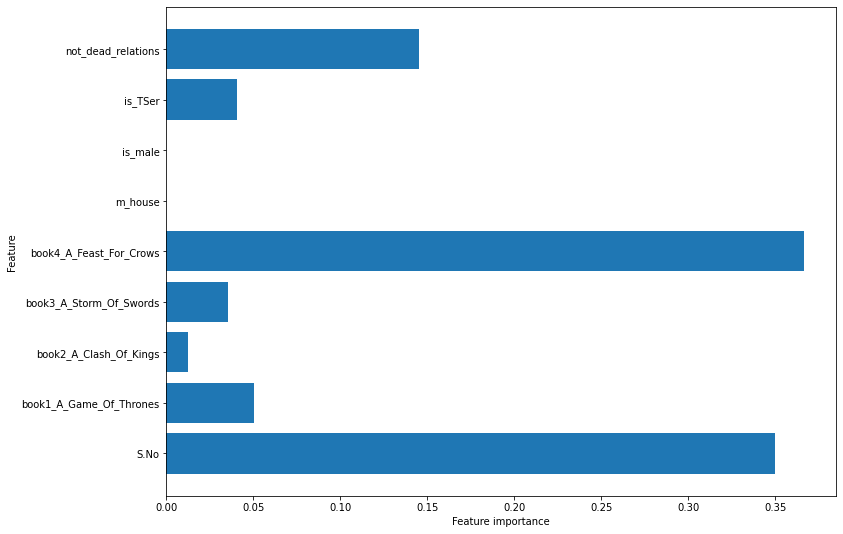

In [54]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [55]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7528         (27, 23, 5, 140)
Full Tree     0.6428           (26, 24, 34, 111)
Pruned Tree   0.6859         (21, 29, 7, 138)



<h2><strong>Step 6: Classification Modeling with KNN</strong></h2><br>
Given that we now have more model performance metrics under our belts, let's return to a model type that is already familiar to us.<br>

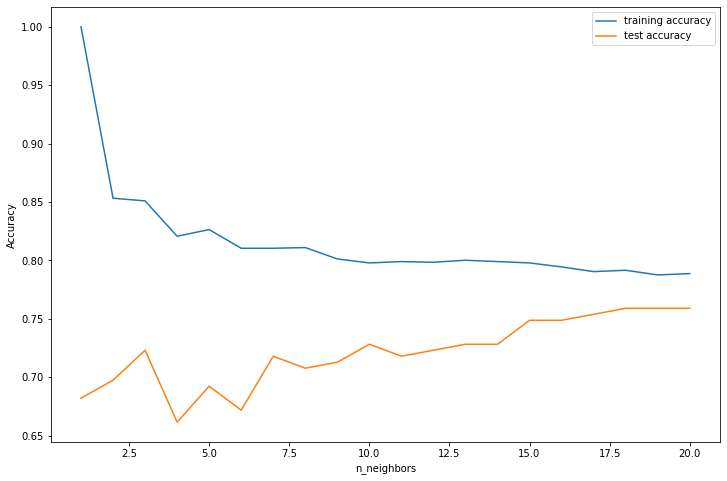

The optimal number of neighbors is: 18


In [56]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

<h3>Building a KNN Classification Model</h3>

In [57]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7824
Testing  ACCURACY: 0.8154
AUC Score        : 0.6597


In [58]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 7
True Positives : 138



<h2><strong>Step 7: Hyperparameter Tuning</h2></strong><br>

In [59]:
########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : [  'S.No','book1_A_Game_Of_Thrones', 
                     'book2_A_Clash_Of_Kings', 
                     'book3_A_Storm_Of_Swords', 
                     'book4_A_Feast_For_Crows', 
                     'book5_A_Dance_with_Dragons', 
                     'isMarried', 
                     'isNoble', 
                     'age', 
                     'numDeadRelations', 
                     'popularity', 
                     'm_title', 
                     'm_culture', 
                     'm_dateOfBirth', 
                     'm_mother', 
                     'm_father', 
                     'm_heir', 
                     'm_house', 
                     'm_spouse', 
                     'm_isAliveMother', 
                     'm_isAliveFather', 
                     'm_isAliveHeir', 
                     'm_isAliveSpouse', 
                     'm_age', 
                     'is_male', 
                     'powerfull_house', 
                     'is_TSer', 
                     'is_culture_unknown', 
                     'not_dead_relations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['S.No','book1_A_Game_Of_Thrones', 
                     'book2_A_Clash_Of_Kings', 
                     'book3_A_Storm_Of_Swords', 
                     'book4_A_Feast_For_Crows', 
                     'm_house',
                     'is_male', 
                     'is_TSer', 
                     'not_dead_relations'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['S.No','book1_A_Game_Of_Thrones', 
                    'book4_A_Feast_For_Crows', 
                    'popularity',
                    'm_house',
                    'not_dead_relations']

}

########################################
# checking previous model performances
########################################
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1    Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2  Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)

In [60]:
# train/test split with the logit_sig variables
GOT_data   =  GOT.loc[ : , candidate_dict['logit_sig_2']]
GOT_target =  GOT.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)

<strong>Logistic Regression with Default Hyperparameters</strong>

In [61]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [62]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7658
Testing  ACCURACY: 0.8718
AUC Score        : 0.7762


<h3>Hyperparameter Tuning with RandomizedSearchCV</h3><br>
<strong>Note:</strong> RandomizedSearchCV searches various combinations of hyperparameters, optimizing for a given metric (in this case, AUC score). <font color='red'><strong>This can take a LONG time.</strong></font> To alleviate this, make sure your ranges are reasonably small.<br><br>

In [63]:
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True]
solver_range     = ['lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/Users/fernandopatron/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 49 is smaller than n_iter=250. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'solver': 'lbfgs', 'C': 4.2}
Tuned CV AUC      : 0.5983


<h3>Logistic Regression with Tuned Hyperparameters</h3>
Let's rebuild our model using the tuned results from RandomizedSearchCV.

In [64]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.2, max_iter=1000, random_state=219, warm_start=True)

In [65]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.2,
                              warm_start   = True,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(GOT_data, GOT_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7664
LR Tuned Testing  ACCURACY: 0.8718
LR Tuned AUC Score        : 0.7828


In [66]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 5
True Positives : 140



In [67]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1    Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2  Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3     Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)

In [68]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(GOT_data, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 49, 'max_depth': 13, 'criterion': 'gini'}
Tuned Training AUC: 0.6207


In [69]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 49,
                                    max_depth        = 13,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7761
Testing  ACCURACY: 0.8615
AUC Score        : 0.7955


In [70]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 10
True Positives : 135



In [71]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1    Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2  Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3     Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4   Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)

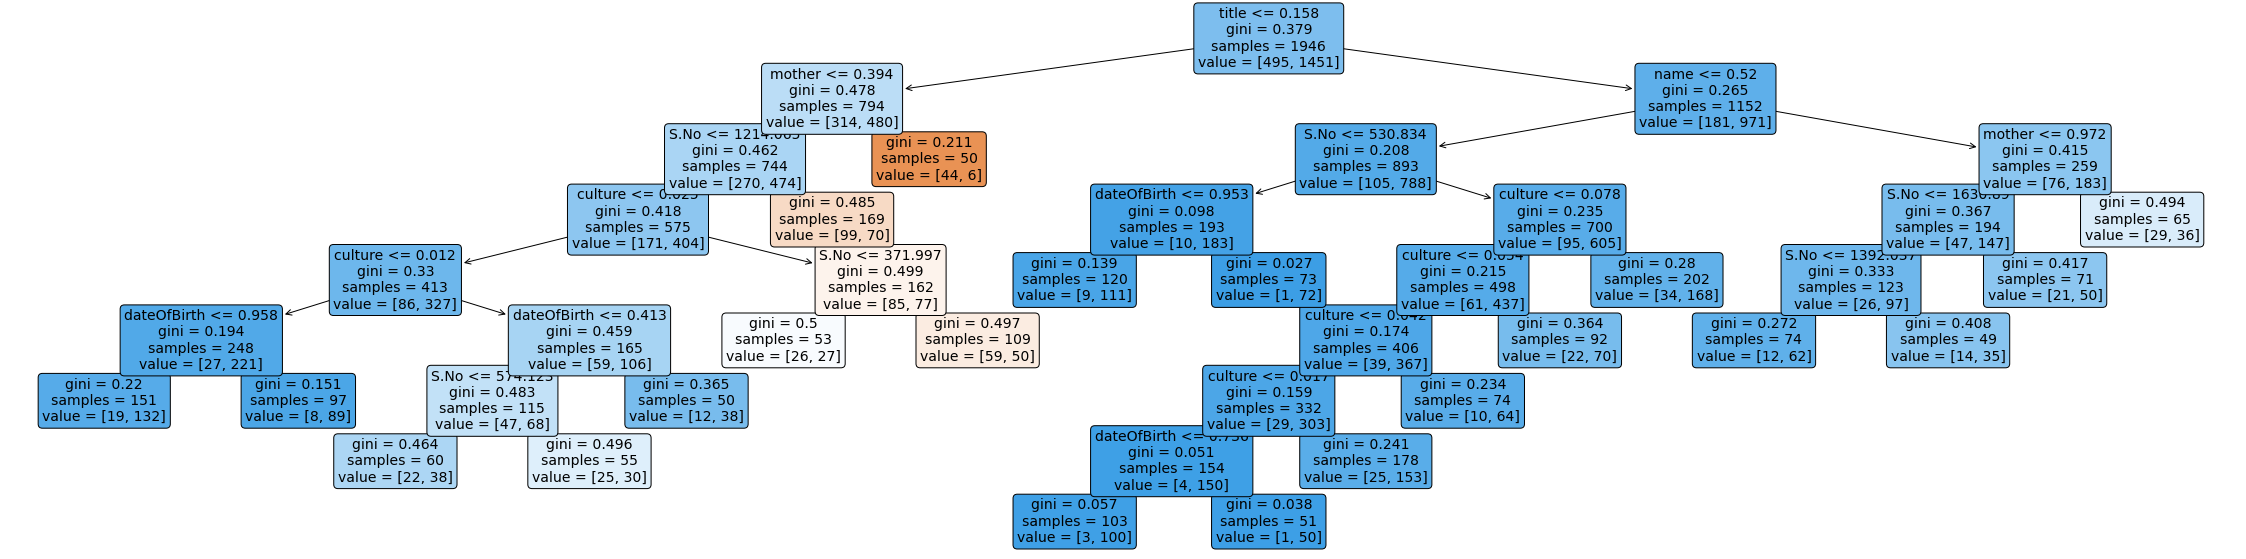

In [72]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<h2><strong> Step 8: Ensemble Modeling <strong></h2><br><br>

Using the logit_full set of explanatory variables.


In [73]:
# train/test split with the logit_sig variables
GOT_data   =  GOT.loc[ : , candidate_dict['logit_full']]
GOT_target =  GOT.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)

<h3>Random Forest</h3>

In [74]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [75]:
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.8513
AUC Score        : 0.7886


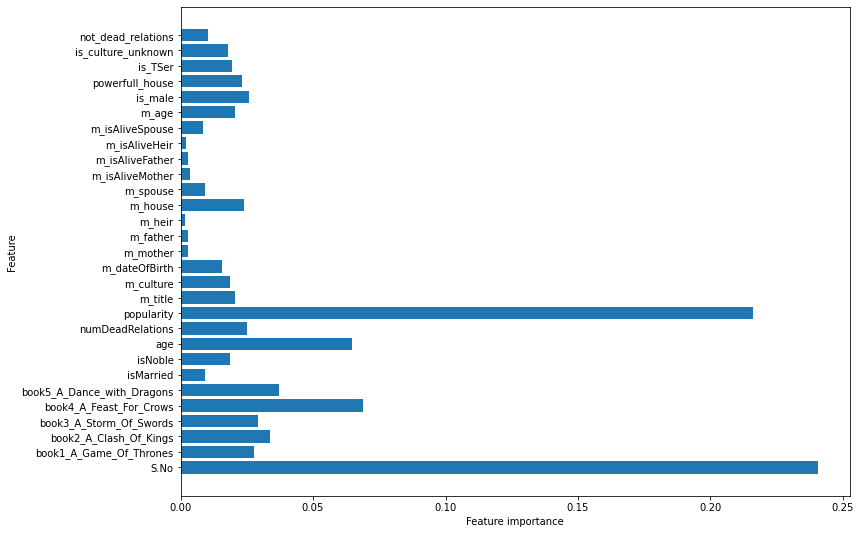

In [76]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [77]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 12
True Positives : 133



The next code will show the results of the tuned classification model to model_performance.

In [78]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1             Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2           Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3              Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4            Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)
5  Random Forest (Full)     0.7886             1.0000            0.8513  (33, 17, 12, 133)

The following code is for tunning the model's hyperparameters using RandomizedSearchCV.<br> 

In [79]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(30, 500, 10)
# leaf_range       = np.arange(1, 25, 5)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]
# max_depth_range  = np.arange(1.0, 8.0, 1.0)

# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range,
#               'max_depth'        : max_depth_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(GOT_data, GOT_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 470, 'min_samples_leaf': 1, 'max_depth': 2.0, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.5922


In [80]:
# # best estimators based on RandomizedSearchCV
# forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=2.0, n_estimators=470,
                       random_state=219)

<h3>Improving Processing Efficiency</h3><br>
Automated hyperparameter optimization can take a long time. In order to avoid having to run this each time a script is loaded, it is a good practice to:
* Run an automated hyperparameter optimization technique and record its results
* Comment out (but not delete) the hyperparameter optimization code
* Manually set each hyperparameter when building a tuned model

<br>
This will help alleviate processing bottlenecks while allowing you to uncomment and rerun the optimization code as needed.

In [81]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 470,
                                      warm_start       = False,
                                      bootstrap        = False,
                                      random_state     = 219,
                                      max_depth        = 2.0)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7704
Forest Tuned Testing  ACCURACY: 0.7744
Forest Tuned AUC Score        : 0.56


The following codes will show the feature importance and the confusion matrix for the model above.

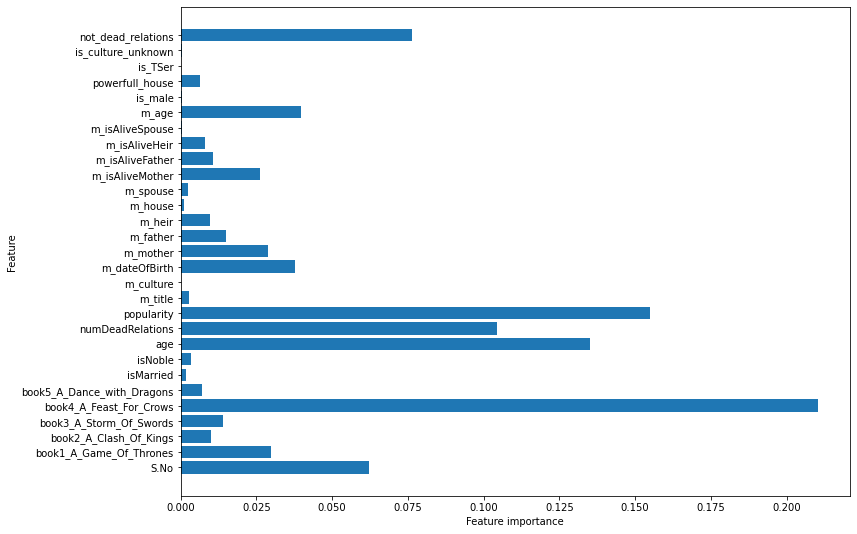

In [82]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [83]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 6
False Positives: 44
False Negatives: 0
True Positives : 145



Run the following code to write the results of the tuned classification model to model_performance.

In [84]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1                   Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2                 Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3                    Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)
5        Random Forest (Full)     0.7886             1.0000            0.8513  (33, 17, 12, 133)
6  Tuned Random Forest (Full)     0.5600             0.7704            0.7744    (6, 44, 0, 145)

<strong><h2>Step 9: Gradient Boosted Machines</h2><strong><br>
    
<h3>Developing a gradient boosting classifier model.</h3><br>
Develop a GradientBoostingClassifier model with default values for the hyperparameters listed below. 

In [85]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8475
Testing ACCURACY : 0.841
AUC Score        : 0.7424


In [86]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 8
True Positives : 137



The next code to score the model and append its results to the performance DataFrame.

In [87]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1                   Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2                 Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3                    Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)
5        Random Forest (Full)     0.7886             1.0000            0.8513  (33, 17, 12, 133)
6  Tuned Random Forest (Full)     0.5600             0.7704            0.7744    (6, 44, 0, 145)
7                  GBM (Full)     0.7424             0.8475            0.8410   (27, 23, 8, 137)

<strong>This code will optimize the hyperparameters of a GBM model using the full dataset.</strong><BR>


In [88]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 1)
# estimator_range    = np.arange(100, 501, 200)
# depth_range        = np.arange(1, 4, 1)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(GOT_data, GOT_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

/Users/fernandopatron/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 54 is smaller than n_iter=500. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.1}
Tuned Training AUC: 0.5194


In [89]:
# checking the best estimator for the model
# full_gbm_cv.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=300, random_state=219,
                           warm_start=True)

In [91]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 1,
                                       n_estimators  = 300,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7995
Testing  ACCURACY: 0.8974
AUC Score        : 0.8328


<strong>Confusion Matrix<strong>

In [92]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 5
True Positives : 140



Saving the results of the tuned classification model to model_performance.

In [93]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1                   Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2                 Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3                    Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)
5        Random Forest (Full)     0.7886             1.0000            0.8513  (33, 17, 12, 133)
6  Tuned Random Forest (Full)     0.5600             0.7704            0.7744    (6, 44, 0, 145)
7                  GBM (Full)     0.7424             0.8475            0.8410   (27, 23, 8, 137)
8                   Tuned GBM     0.8328             0.7995            0.8974   (35, 15, 5, 140)

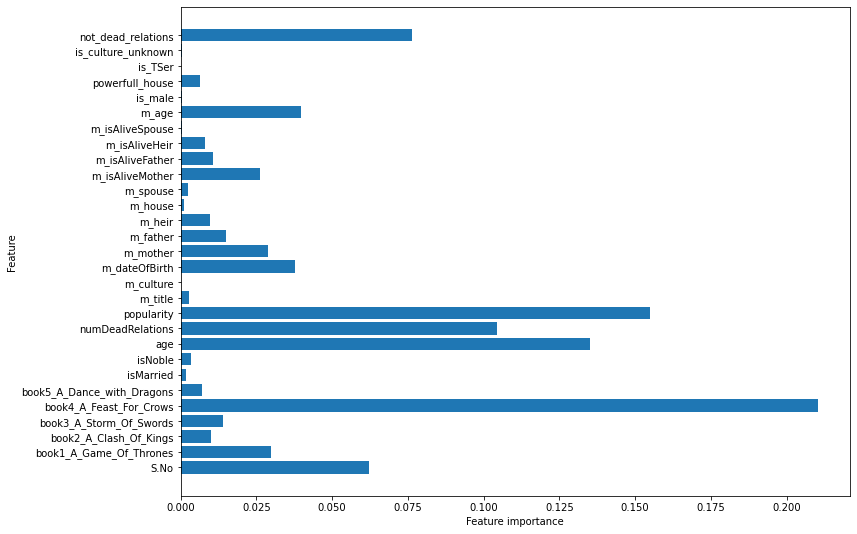

In [97]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [94]:
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7528             0.7647            0.8564   (27, 23, 5, 140)
1                   Full Tree     0.6428             1.0000            0.7026  (26, 24, 34, 111)
2                 Pruned Tree     0.6859             0.7807            0.8154   (21, 29, 7, 138)
3                    Tuned LR     0.7828             0.7664            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7955             0.7761            0.8615  (33, 17, 10, 135)
5        Random Forest (Full)     0.7886             1.0000            0.8513  (33, 17, 12, 133)
6  Tuned Random Forest (Full)     0.5600             0.7704            0.7744    (6, 44, 0, 145)
7                  GBM (Full)     0.7424             0.8475            0.8410   (27, 23, 8, 137)
8                   Tuned GBM     0.8328             0.7995            0.8974   (35, 15, 5, 140)

<strong><h2>Dinamic Print</h2><strong><br>
    
The next table with compare all the results from all our models. 
    According to the best AUC score, I decided to choose <strong>"Tuned GBM"</strong> which has a AUC score of: <ins>0.8328</ins>

In [96]:
# comparing results

print(f"""
     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        {model_performance['AUC Score'][0]}       {model_performance['Training Accuracy'][0]}       {model_performance['Testing Accuracy'][0]}       {model_performance['Confusion Matrix'][0]}
2. Full Tree       {model_performance['AUC Score'][1]}       {model_performance['Training Accuracy'][1]}          {model_performance['Testing Accuracy'][1]}       {model_performance['Confusion Matrix'][1]}
3. Pruned Tree     {model_performance['AUC Score'][2]}       {model_performance['Training Accuracy'][2]}       {model_performance['Testing Accuracy'][2]}       {model_performance['Confusion Matrix'][2]}
4. Tuned LR        {model_performance['AUC Score'][3]}       {model_performance['Training Accuracy'][3]}       {model_performance['Testing Accuracy'][3]}       {model_performance['Confusion Matrix'][3]}
5. Tuned Tree      {model_performance['AUC Score'][4]}       {model_performance['Training Accuracy'][4]}       {model_performance['Testing Accuracy'][4]}       {model_performance['Confusion Matrix'][4]}
6. Random Forest   {model_performance['AUC Score'][5]}       {model_performance['Training Accuracy'][5]}          {model_performance['Testing Accuracy'][5]}       {model_performance['Confusion Matrix'][5]}
    (Full)
7. Tuned Random    {model_performance['AUC Score'][6]}         {model_performance['Training Accuracy'][6]}       {model_performance['Testing Accuracy'][6]}       {model_performance['Confusion Matrix'][6]}
   Forest (Full)
8. GBM (Full)      {model_performance['AUC Score'][7]}       {model_performance['Training Accuracy'][7]}       {model_performance['Testing Accuracy'][7]}        {model_performance['Confusion Matrix'][7]}
9. Tuned GBM*      {model_performance['AUC Score'][8]}       {model_performance['Training Accuracy'][8]}       {model_performance['Testing Accuracy'][8]}       {model_performance['Confusion Matrix'][8]}
* Final Model
""")


     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        0.7528       0.7647       0.8564       (27, 23, 5, 140)
2. Full Tree       0.6428       1.0          0.7026       (26, 24, 34, 111)
3. Pruned Tree     0.6859       0.7807       0.8154       (21, 29, 7, 138)
4. Tuned LR        0.7828       0.7664       0.8718       (30, 20, 5, 140)
5. Tuned Tree      0.7955       0.7761       0.8615       (33, 17, 10, 135)
6. Random Forest   0.7886       1.0          0.8513       (33, 17, 12, 133)
    (Full)
7. Tuned Random    0.56         0.7704       0.7744       (6, 44, 0, 145)
   Forest (Full)
8. GBM (Full)      0.7424       0.8475       0.841        (27, 23, 8, 137)
9. Tuned GBM*      0.8328       0.7995       0.8974       (35, 15, 5, 140)
* Final Model



<h2><strong>Conclusion</strong></h2><br>

According to the model presented above, we can conclude that there are several variables that can serve to predict whether a character will survive or, in the same way, precede if he will die before at the end of book 5 of Game of Thrones. The main ones are if the character appeared in book 4, popularity of the character in the show, age, death relatives, and order of appearance. In that order, these variables are the ones that have the greatest weight in the probability that a certain character can survive or die, although perhaps GOT fans do not see it that way. It's hard to think and make calculations while you entertain yourself sitting on your couch but this study reveals those probabilities, so maybe the next time we see this HBO hit (although I doubt that anyone will dedicate so many hours of their life to see again something so long) this analysis makes sense and we can realize from the beginning who are those who are going to survive and thus avoid disappointments and broken hearts.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

~~~
(o)__(o)\\  //  wWw        wWw \\\  /// _     
 (__  __)(o)(o)  (O)_       (O)_((O)(O))/||_   
   (  )  ||  ||  / __)      / __)| \ ||  /o_)  
    )(   |(__)| / (        / (   ||\\|| / |(\  
   (  )  /.--.\(  _)      (  _)  || \ | | | )) 
    )/  -'    `-\ \_       \ \_  ||  || | |//  
   (             \__)       \__)(_/  \_)\__/   
                                       


~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />